## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

pumpkins = pd.read_csv('C:/Users/pc/Downloads/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

-0.024603588300963937
-0.03850149717816154
Mean error: 5.96 (33.6%)


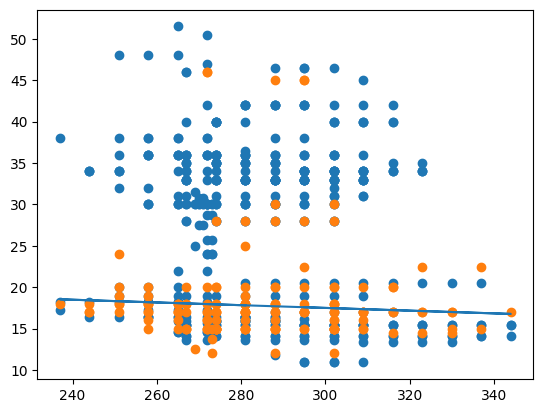

Mean error: 6.21 (34.8%)


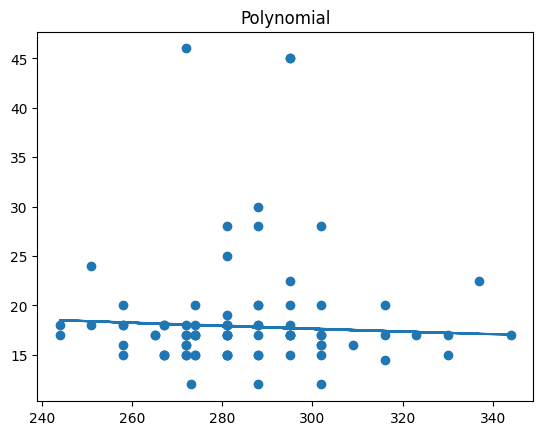

Model determination:  0.0038109557317465015


In [3]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)
print(new_pumpkins['Month'].corr(new_pumpkins['Low Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Low Price']))
X = new_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = new_pumpkins['Low Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.366, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model=LinearRegression()

model.fit(X_train, y_train)
modelpred=model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test,modelpred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(modelpred)*100:3.3}%)')

plt.scatter(X_test,y_test)
plt.plot(X_test,modelpred)
plt.show()
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X1_train,y1_train)

# predict results for test data
pred = pipeline.predict(X1_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y1_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
plt.scatter(X1_test, y1_test)
plt.plot(X1_test,pred)
plt.title('Polynomial')
plt.show()
score = pipeline.score(X1_train,y1_train)
print('Model determination: ', score)


MODEL CREATION , This main goal of this model is to be predicting Incidence of malaria (per 1,000 population at risk) using Africa Malaria Dataset.

In [4]:
Afmalaria = pd.read_csv('C:/Users/pc/Downloads/DatasetAfricaMalaria.csv')
def clean_data(Afmalaria):
    # Drop column: 'Country Code'
    Afmalaria = Afmalaria.drop(columns=['Country Code'])
    # Drop column: 'Use of insecticide-treated bed nets (% of under-5 population)'
    Afmalaria = Afmalaria.drop(columns=['Use of insecticide-treated bed nets (% of under-5 population)'])
    # Drop column: 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'
    Afmalaria = Afmalaria.drop(columns=['Children with fever receiving antimalarial drugs (% of children under age 5 with fever)'])
    # Drop column: 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'
    Afmalaria = Afmalaria.drop(columns=['Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)'])
    # Drop column: 'People using safely managed drinking water services (% of population)'
    Afmalaria = Afmalaria.drop(columns=['People using safely managed drinking water services (% of population)'])
    # Drop column: 'People using safely managed drinking water services, rural (% of rural population)'
    Afmalaria = Afmalaria.drop(columns=['People using safely managed drinking water services, rural (% of rural population)'])
    # Drop column: 'People using safely managed drinking water services, urban (% of urban population)'
    Afmalaria = Afmalaria.drop(columns=['People using safely managed drinking water services, urban (% of urban population)'])
    # Drop column: 'People using safely managed sanitation services (% of population)'
    Afmalaria = Afmalaria.drop(columns=['People using safely managed sanitation services (% of population)'])
    # Drop column: 'People using safely managed sanitation services, rural (% of rural population)'
    Afmalaria = Afmalaria.drop(columns=['People using safely managed sanitation services, rural (% of rural population)'])
    # Drop column: 'People using safely managed sanitation services, urban  (% of urban population)'
    Afmalaria = Afmalaria.drop(columns=['People using safely managed sanitation services, urban  (% of urban population)'])
    # Drop column: 'geometry'
    Afmalaria = Afmalaria.drop(columns=['geometry'])
    # Drop column: 'longitude'
    Afmalaria = Afmalaria.drop(columns=['longitude'])
    # Drop column: 'latitude'
    Afmalaria = Afmalaria.drop(columns=['latitude'])
    # Drop column: 'People using at least basic sanitation services, urban  (% of urban population)'
    Afmalaria = Afmalaria.drop(columns=['People using at least basic sanitation services, urban  (% of urban population)'])
    # Drop column: 'People using at least basic sanitation services, rural (% of rural population)'
    Afmalaria = Afmalaria.drop(columns=['People using at least basic sanitation services, rural (% of rural population)'])
    # Drop column: 'People using at least basic sanitation services (% of population)'
    Afmalaria = Afmalaria.drop(columns=['People using at least basic sanitation services (% of population)'])
    # Drop column: 'People using at least basic drinking water services, urban (% of urban population)'
    Afmalaria = Afmalaria.drop(columns=['People using at least basic drinking water services, urban (% of urban population)'])
    # Drop column: 'People using at least basic drinking water services, rural (% of rural population)'
    Afmalaria = Afmalaria.drop(columns=['People using at least basic drinking water services, rural (% of rural population)'])
    # Drop column: 'People using at least basic drinking water services (% of population)'
    Afmalaria = Afmalaria.drop(columns=['People using at least basic drinking water services (% of population)'])
    # Drop column: 'Urban population growth (annual %)'
    Afmalaria = Afmalaria.drop(columns=['Urban population growth (annual %)'])
    # Drop column: 'Rural population growth (annual %)'
    Afmalaria = Afmalaria.drop(columns=['Rural population growth (annual %)'])
    # Replace missing values with the mean of each column in: 'Incidence of malaria (per 1,000 population at risk)', 'Malaria cases reported' and 2 other columns
    Afmalaria = Afmalaria.fillna({'Incidence of malaria (per 1,000 population at risk)': Afmalaria['Incidence of malaria (per 1,000 population at risk)'].mean(), 'Malaria cases reported': Afmalaria['Malaria cases reported'].mean(), 'Rural population (% of total population)': Afmalaria['Rural population (% of total population)'].mean(), 'Urban population (% of total population)': Afmalaria['Urban population (% of total population)'].mean()})
    return Afmalaria

Afmalaria_clean = clean_data(Afmalaria.copy())
Afmalaria_clean.head()

X2 = pd.get_dummies(Afmalaria['Country Name']) \
        .join(Afmalaria['Year']) \
        .join(Afmalaria['Malaria cases reported']) \
        .join(Afmalaria['Rural population (% of total population)']) \
        .join(Afmalaria['Urban population (% of total population)']) 
y2 = Afmalaria['Incidence of malaria (per 1,000 population at risk)']
y2=y2.fillna(y2.mean())
X2=X2.fillna(X2.mean())
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train2,y_train2)
# setup and train the pipeline
pred2 = lin_reg2.predict(X_test2)

mse2 = np.sqrt(mean_squared_error(y_test2,pred2))
print(f'Mean error 2: {mse2:3.3} ({mse2/np.mean(pred2)*100:3.3}%)')

score2 = lin_reg2.score(X_train2,y_train2)
print('Model determination 1: ', score2)



Mean error 2: 54.4 (28.6%)
Model determination 1:  0.8995863097387258
